# Data Import

In [1]:
!ls -GFlash data/ | grep parquet

216M -rw-r--r-- 1 9455 216M Oct  7  2022 Combined_Flights_2018.parquet
295M -rw-r--r-- 1 9455 295M Oct  7  2022 Combined_Flights_2019.parquet
175M -rw-r--r-- 1 9455 175M Oct  7  2022 Combined_Flights_2020.parquet
232M -rw-r--r-- 1 9455 232M Oct  7  2022 Combined_Flights_2021.parquet
143M -rw-r--r-- 1 9455 143M Oct  7  2022 Combined_Flights_2022.parquet


In [2]:
!ls -GFlash data/ | grep csv

 40K -rw-r--r-- 1 9455  39K Oct  7  2022 Airlines.csv
1.9G -rw-r--r-- 1 9455 1.9G Oct  7  2022 Combined_Flights_2018.csv
2.7G -rw-r--r-- 1 9455 2.7G Oct  7  2022 Combined_Flights_2019.csv
1.7G -rw-r--r-- 1 9455 1.7G Oct  7  2022 Combined_Flights_2020.csv
2.1G -rw-r--r-- 1 9455 2.1G Oct  7  2022 Combined_Flights_2021.csv
1.4G -rw-r--r-- 1 9455 1.4G Oct  7  2022 Combined_Flights_2022.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

pd.set_option("display.max_columns", 500)
pal = sns.color_palette()

In [4]:
parquet_files = glob("data/*.parquet")

In [42]:
column_subset = [
    "Year",
    "Month",
    "DayofMonth",
    "DayOfWeek",
    "FlightDate",
    "Airline",
    "Flight_Number_Marketing_Airline",
    "Origin", # Origin Airport
    "Dest", # Destination Airport
    "CRSDepTime", # CRS Computerized Reservations Systems Departure Time (local time: hhmm)
    "DepTime", # Actual Departure Time (local time: hhmm)
    "Distance",
    "DepDelayMinutes", # Difference in minutes between scheduled and actual departure time. Early departures set to 0
    "OriginAirportID",
    "OriginCityName",
    "OriginStateName",
    "DestAirportID",
    "DestCityName",
    "DestStateName",
    "Marketing_Airline_Network",
    "IATA_Code_Marketing_Airline",
    "Operated_or_Branded_Code_Share_Partners",
    "TaxiOut", # Taxi Out Time, in Minutes
    "TaxiIn", # Taxi In Time, in Minutes
    "CRSArrTime", # CRS Computerized Reservations Systems Arrival Time (local time: hhmm)
    "ArrTime", # Actual Arrival Time (local time: hhmm)
    "ArrDelayMinutes", # Difference in minutes between scheduled and actual arrival time. Early arrivals set to 0.
    "Diverted", # Target, Diverted Flight Indicator (1=Yes)
    "Cancelled", # Target, Cancelled Flight Indicator (1=Yes)
    # "CancellationCode", # Target, Specifies The Reason For Cancellation
]

dfs = []
for f in parquet_files:
    dfs.append(pd.read_parquet(f, columns=column_subset))
df = pd.concat(dfs).reset_index(drop=True)

cat_cols = ["Airline", "Origin", "Dest", "OriginStateName", "DestStateName"]
for c in cat_cols:
    df[c] = df[c].astype("category")

In [44]:
df.sample(10)

,Year,Month,DayofMonth,DayOfWeek,FlightDate,Airline,Flight_Number_Marketing_Airline,Origin,Dest,CRSDepTime,DepTime,Distance,DepDelayMinutes,OriginAirportID,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,Marketing_Airline_Network,IATA_Code_Marketing_Airline,Operated_or_Branded_Code_Share_Partners,TaxiOut,TaxiIn,CRSArrTime,ArrTime,ArrDelayMinutes,Diverted,Cancelled
12091907,2019,3,25,1,2019-03-25,Frontier Airlines Inc.,279,STL,DEN,945,944.0,770.0,0.0,15016,"St. Louis, MO",Missouri,11292,"Denver, CO",Colorado,F9,F9,F9,10.0,7.0,1113,1054.0,0.0,False,False
27549062,2022,6,10,5,2022-06-10,United Air Lines Inc.,242,DEN,PDX,800,752.0,991.0,0.0,11292,"Denver, CO",Colorado,14057,"Portland, OR",Oregon,UA,UA,UA,15.0,5.0,940,928.0,0.0,False,False
8869170,2019,9,26,4,2019-09-26,Delta Air Lines Inc.,1568,GSP,ATL,815,811.0,153.0,0.0,11996,"Greer, SC",South Carolina,10397,"Atlanta, GA",Georgia,DL,DL,DL,15.0,5.0,924,905.0,0.0,False,False
9142253,2019,10,22,2,2019-10-22,JetBlue Airways,2889,JFK,MCO,1351,1345.0,944.0,0.0,12478,"New York, NY",New York,13204,"Orlando, FL",Florida,B6,B6,B6,27.0,4.0,1643,1633.0,0.0,False,False
25024223,2021,6,14,1,2021-06-14,SkyWest Airlines Inc.,4334,LSE,MSP,1725,1719.0,119.0,0.0,13076,"La Crosse, WI",Wisconsin,13487,"Minneapolis, MN",Minnesota,DL,DL,DL_CODESHARE,8.0,8.0,1824,1802.0,0.0,False,False
10941042,2019,7,20,6,2019-07-20,American Airlines Inc.,2888,IND,CLT,1706,1708.0,427.0,2.0,12339,"Indianapolis, IN",Indiana,11057,"Charlotte, NC",North Carolina,AA,AA,AA,9.0,8.0,1851,1828.0,0.0,False,False
2183474,2018,12,3,1,2018-12-03,SkyWest Airlines Inc.,4470,DTW,MKE,2010,2010.0,237.0,0.0,11433,"Detroit, MI",Michigan,13342,"Milwaukee, WI",Wisconsin,DL,DL,DL_CODESHARE,21.0,4.0,2044,2021.0,0.0,False,False
7527863,2019,8,1,4,2019-08-01,Envoy Air,4170,MEM,MIA,1124,1121.0,859.0,0.0,13244,"Memphis, TN",Tennessee,13303,"Miami, FL",Florida,AA,AA,AA_CODESHARE,17.0,5.0,1450,1456.0,6.0,False,False
26217873,2022,7,2,6,2022-07-02,Comair Inc.,5377,CLT,MSY,905,900.0,651.0,0.0,11057,"Charlotte, NC",North Carolina,13495,"New Orleans, LA",Louisiana,AA,AA,AA_CODESHARE,20.0,3.0,1017,952.0,0.0,False,False
22909744,2021,7,19,1,2021-07-19,"Commutair Aka Champlain Enterprises, Inc.",4835,IAH,TYS,1215,1800.0,771.0,345.0,12266,"Houston, TX",Texas,15412,"Knoxville, TN",Tennessee,UA,UA,UA_CODESHARE,30.0,5.0,1529,2110.0,341.0,False,False


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29193782 entries, 0 to 29193781
Data columns (total 29 columns):
 #   Column                                   Dtype         
---  ------                                   -----         
 0   Year                                     int64         
 1   Month                                    int64         
 2   DayofMonth                               int64         
 3   DayOfWeek                                int64         
 4   FlightDate                               datetime64[ns]
 5   Airline                                  category      
 6   Flight_Number_Marketing_Airline          int64         
 7   Origin                                   category      
 8   Dest                                     category      
 9   CRSDepTime                               int64         
 10  DepTime                                  float64       
 11  Distance                                 float64       
 12  DepDelayMinutes           

In [8]:
df[df["Cancelled"] == True]

,Year,Month,DayofMonth,DayOfWeek,FlightDate,Airline,Flight_Number_Marketing_Airline,Origin,Dest,CRSDepTime,DepTime,DepDelayMinutes,OriginAirportID,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,TaxiOut,TaxiIn,CRSArrTime,ArrTime,ArrDelayMinutes,Diverted,Cancelled
23,2018,1,17,3,2018-01-17,Endeavor Air Inc.,3298,ATL,ABY,1037,NaN,NaN,10397,"Atlanta, GA",Georgia,10146,"Albany, GA",Georgia,NaN,NaN,1137,NaN,NaN,False,True
49,2018,1,12,5,2018-01-12,Endeavor Air Inc.,3299,ATL,EVV,939,NaN,NaN,10397,"Atlanta, GA",Georgia,11612,"Evansville, IN",Indiana,NaN,NaN,1008,NaN,NaN,False,True
54,2018,1,17,3,2018-01-17,Endeavor Air Inc.,3299,ATL,EVV,939,NaN,NaN,10397,"Atlanta, GA",Georgia,11612,"Evansville, IN",Indiana,NaN,NaN,1008,NaN,NaN,False,True
101,2018,1,4,4,2018-01-04,Endeavor Air Inc.,3301,ATL,EWN,1225,NaN,NaN,10397,"Atlanta, GA",Georgia,11617,"New Bern/Morehead/Beaufort, NC",North Carolina,NaN,NaN,1350,NaN,NaN,False,True
128,2018,1,4,4,2018-01-04,Endeavor Air Inc.,3301,EWN,ATL,1415,NaN,NaN,11617,"New Bern/Morehead/Beaufort, NC",North Carolina,10397,"Atlanta, GA",Georgia,NaN,NaN,1605,NaN,NaN,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29193660,2022,3,31,4,2022-03-31,Republic Airlines,3706,EWR,SDF,1958,NaN,NaN,11618,"Newark, NJ",New Jersey,14730,"Louisville, KY",Kentucky,NaN,NaN,2225,NaN,NaN,False,True
29193664,2022,3,31,4,2022-03-31,Republic Airlines,3710,MYR,EWR,1856,NaN,NaN,13577,"Myrtle Beach, SC",South Carolina,11618,"Newark, NJ",New Jersey,NaN,NaN,2059,NaN,NaN,False,True
29193698,2022,3,2,3,2022-03-02,Republic Airlines,3438,RDU,EWR,1430,957.0,1167.0,14492,"Raleigh/Durham, NC",North Carolina,11618,"Newark, NJ",New Jersey,NaN,NaN,1623,NaN,NaN,False,True
29193775,2022,3,31,4,2022-03-31,Republic Airlines,3687,EWR,PIT,1829,2033.0,124.0,11618,"Newark, NJ",New Jersey,14122,"Pittsburgh, PA",Pennsylvania,NaN,NaN,2006,NaN,NaN,False,True


# Data Analysis

## How many flights are scheduled per year?


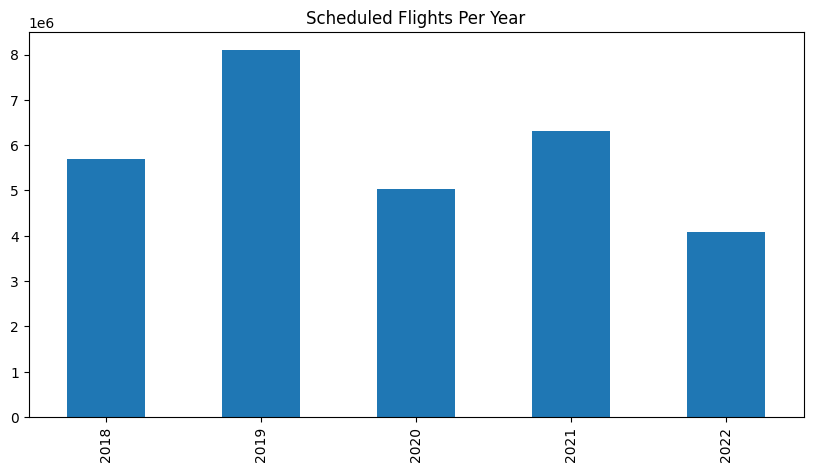

In [9]:
df["Year"] = df['FlightDate'].dt.year
df["Year"].value_counts().sort_index().plot(
    kind="bar", figsize=(10, 5), title="Scheduled Flights Per Year"
)
plt.show()

In [63]:
total_flights = len(df)
cancelled_flights = df['Cancelled'].sum()  # This works if Cancelled is 1 for cancelled flights and 0 otherwise
cancellation_ratio = cancelled_flights / total_flights

print(f"Total flights: {total_flights}")
print(f"Cancelled flights: {cancelled_flights}")
print(f"Cancellation ratio: {cancellation_ratio:.2f}")

Total flights: 29193782
Cancelled flights: 777267
Cancellation ratio: 0.03


Text(0.5, 0.92, 'US Flight Cancellations')

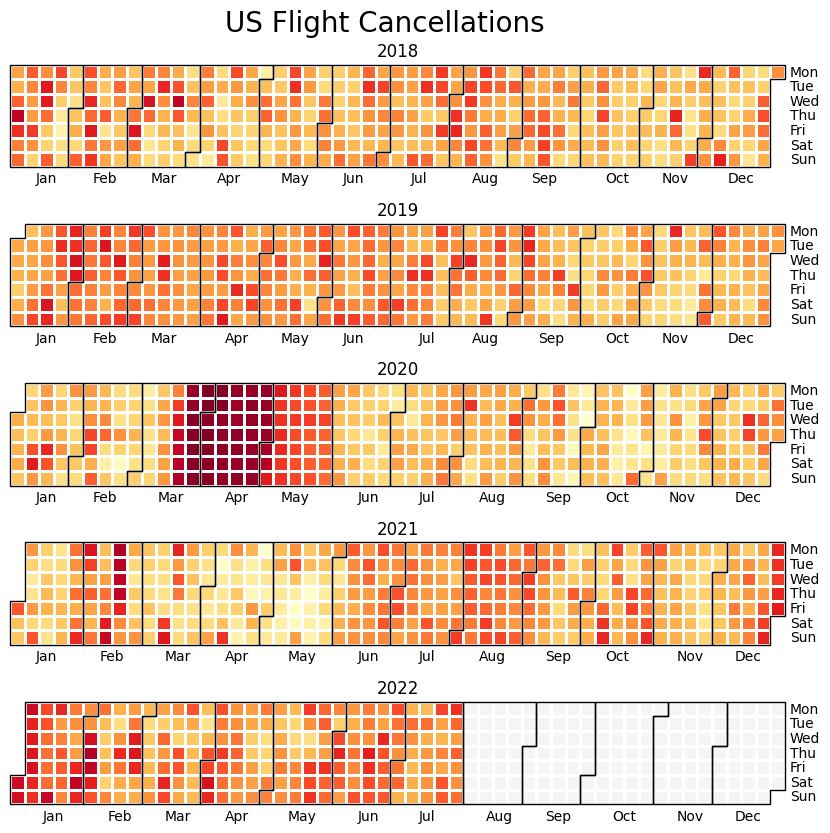

In [11]:
import calmap
events = df.groupby("FlightDate")["Cancelled"].mean()
fig, axs = plt.subplots(5, 1, figsize=(10, 10))
for i, year in enumerate([2018, 2019, 2020, 2021, 2022]):
    calmap.yearplot(
        events.apply(np.log), year=year, cmap="YlOrRd", monthly_border=True, ax=axs[i]
    )
    axs[i].set_title(year)
fig.patch.set_facecolor("white")
fig.suptitle("US Flight Cancellations", y=0.92, fontsize=20)

In [54]:
# Excluding Spring 2020 from data set to avoid introducing bias from cancellation policies due to the pandemic 

start_date = '2020-03-01'
end_date = '2020-06-30'

# Filter out the dates that fall within this range
df_filtered = df[~((df['FlightDate'] >= start_date) & (df['FlightDate'] <= end_date))]


# Prediction

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report

# Select Features

In [55]:
feature_columns = ["Year", "Month", "DayofMonth", "DayOfWeek", "CRSDepTime", "CRSArrTime", "OriginAirportID", "DestAirportID", "Flight_Number_Marketing_Airline", "Distance"]
target_column = ["Cancelled"]

X = df_filtered[feature_columns]
y = df_filtered[target_column]

In [56]:
df[feature_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29193782 entries, 0 to 29193781
Data columns (total 10 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Year                             int64  
 1   Month                            int64  
 2   DayofMonth                       int64  
 3   DayOfWeek                        int64  
 4   CRSDepTime                       int64  
 5   CRSArrTime                       int64  
 6   OriginAirportID                  int64  
 7   DestAirportID                    int64  
 8   Flight_Number_Marketing_Airline  int64  
 9   Distance                         float64
dtypes: float64(1), int64(9)
memory usage: 2.2 GB


## Split upt test and train set 

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [58]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\9455\workspace\ml_workshop\venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\9455\workspace\ml_workshop\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, log_loss


In [60]:
# Making predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
logloss = log_loss(y_test, y_pred_proba)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')
print(f'Log Loss: {logloss}')

C:\Users\9455\workspace\ml_workshop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.98162649367827
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC: 0.5955992220488232
Log Loss: 0.09063334433295121


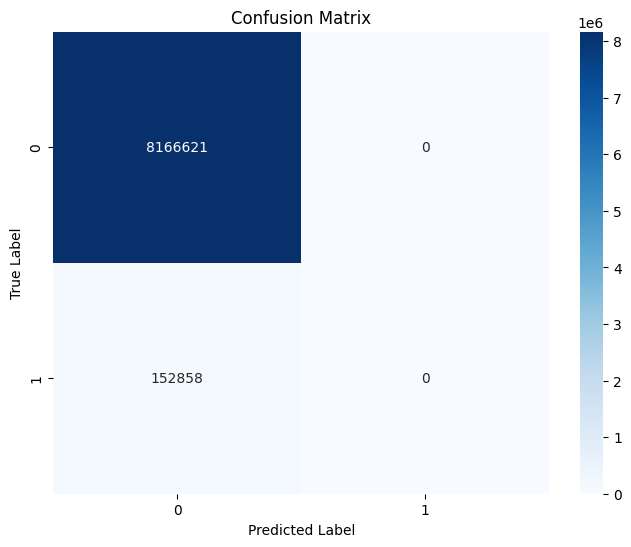

In [61]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

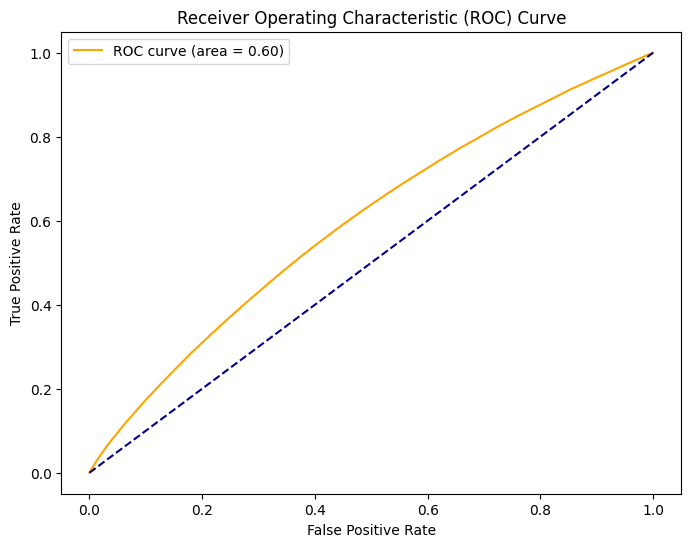

In [62]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
# Convert categorical features to integer codes
# for column in ['categorical_feature1', 'categorical_feature2']:
#     lbl = LabelEncoder()
#    df[column] = lbl.fit_transform(df[column])

# Split data into features and target
X = df_filtered[feature_columns]
y = df_filtered[target_column]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:
import lightgbm as lgb

# Create the LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Define parameters
params = {
    'objective': 'binary',  # for binary classification
    'metric': 'binary_logloss',  # metric for binary classification
    'boosting_type': 'gbdt',  # default and recommended boosting type
    'num_leaves': 31,  # default value
    'learning_rate': 0.05,  # default is 0.1
    # Add more parameters here if needed
}

# Train the model
model = lgb.train(params, train_data, valid_sets=[test_data], num_boost_round=100)


[LightGBM] [Info] Number of positive: 406758, number of negative: 21778517
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.159328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1478
[LightGBM] [Info] Number of data points in the train set: 22185275, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018335 -> initscore=-3.980461
[LightGBM] [Info] Start training from score -3.980461


In [71]:
from sklearn.metrics import classification_report, roc_auc_score

# Make predictions
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

# Convert probabilities to binary output using a threshold (e.g., 0.5)
y_pred_binary = (y_pred >= 0.5).astype(int)

# Evaluate the model
print(classification_report(y_test, y_pred_binary))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.98      1.00      0.99   5444225
        True       0.81      0.01      0.01    102094

    accuracy                           0.98   5546319
   macro avg       0.90      0.50      0.50   5546319
weighted avg       0.98      0.98      0.97   5546319

ROC AUC Score: 0.7695022117053859


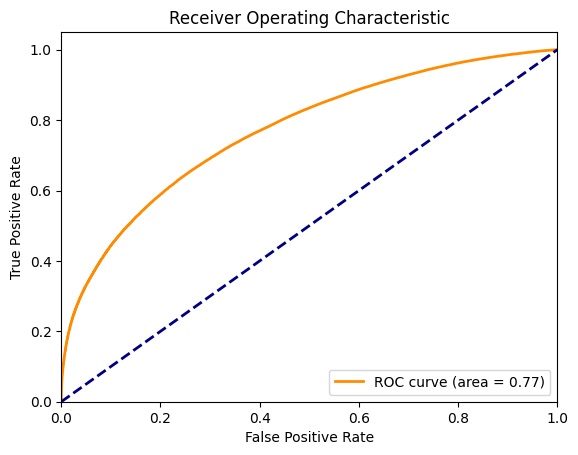

In [73]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_test is your true labels and model is your trained LightGBM model
y_pred_prob = model.predict(X_test, num_iteration=model.best_iteration)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


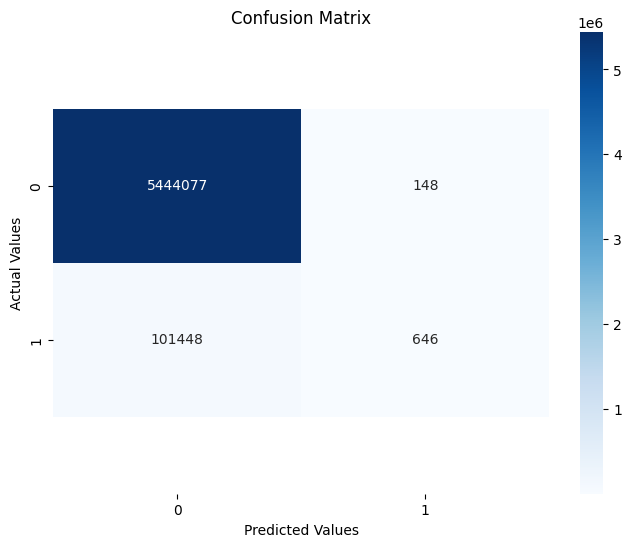

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming y_test is your true labels and model is your trained LightGBM model
y_pred_prob = model.predict(X_test, num_iteration=model.best_iteration)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)  # Using 0.5 as the threshold

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

# Fix for matplotlib bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim()  # discover the values for bottom and top
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # update the ylim(bottom, top) values

plt.show()


